# setup

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Cursor, Button
from mpl_toolkits.mplot3d import Axes3D

In [16]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


# understand the data

In [17]:
df = pd.read_csv('AppleStore.csv')
df.head(10)

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45
5,6,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,Games,47,1
6,7,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,Finance,37,19
7,8,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,Music,37,1
8,9,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,Utilities,37,1
9,10,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,Games,38,10


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  lang.num          7197 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


In [19]:
df.describe()

,Unnamed: 0,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,lang.num
count,7197.000000,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,5.434903
std,3093.625213,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,7.919593
min,1.000000,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000
25%,2090.000000,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,1.000000
50%,4380.000000,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,1.000000
75%,7223.000000,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,8.000000
max,11097.000000,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,75.000000


In [20]:
df['currency'].value_counts()
#the only currency is USD

USD    7197
Name: currency, dtype: int64

# top apps

## top 15 rating count

In [21]:
dfTop15 = df.sort_values('rating_count_tot', ascending=False).head(15).copy()
dfTop15 = dfTop15.reset_index(drop=True)
dfTop15

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,17,Facebook,389879808,USD,0.00,2974676,212,3.5,3.5,95,Social Networking,37,29
1,591,Instagram,113954816,USD,0.00,2161558,1289,4.5,4.0,10.23,Photo & Video,37,29
2,1561,Clash of Clans,116476928,USD,0.00,2130805,579,4.5,4.5,9.24.12,Games,38,18
3,810,Temple Run,65921024,USD,0.00,1724546,3842,4.5,4.0,1.6.2,Games,40,1
4,8,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,Music,37,1
5,863,Pinterest,74778624,USD,0.00,1061624,1814,4.5,4.0,6.26,Social Networking,37,27
6,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45
7,1731,Candy Crush Saga,222846976,USD,0.00,961794,2453,4.5,4.5,1.101.0,Games,43,24
8,202,Spotify Music,132510720,USD,0.00,878563,8253,4.5,4.5,8.4.3,Music,37,18
9,310,Angry Birds,175966208,USD,0.00,824451,107,4.5,3.0,7.4.0,Games,38,10


## top 20 rating

In [22]:
dfTop20 = df.sort_values('user_rating', ascending=False).head(20).copy()
dfTop20

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
7196,11097,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1,Games,40,2
6231,8904,激おこ!! はじめしゃちょー なんなんですか!?,211661824,USD,0.00,1,1,5.0,5.0,1.0.4,Games,40,1
2531,2991,Mini Metro,113240064,USD,4.99,4064,338,5.0,5.0,1.6.1,Games,37,1
2530,2990,"Wayfair - Shop Furniture, Home Decor, Daily Sales",165069824,USD,0.00,12578,146,5.0,5.0,4.24.2,Shopping,37,3
4885,6343,Mystic Castle - the Simplest & Best RPG and Ad...,73411584,USD,0.00,650,488,5.0,4.5,2.6.4,Games,38,33
843,959,CCW – Concealed Carry 50 State Guide,22264832,USD,1.99,644,45,5.0,4.5,3.3,Reference,40,1
6253,8949,"PS Deals+ - Games Price Alerts for PS4, PS3, Vita",70203392,USD,2.99,28,6,5.0,4.5,2.2.1,News,37,2
850,967,驴妈妈旅游-订景点门票机票火车票特价酒店,145368064,USD,0.00,30,0,5.0,0.0,7.9.6,Travel,37,1
3672,4476,Productive habits & daily goals tracker,9256960,USD,0.00,4736,1519,5.0,5.0,1.3.4,Productivity,38,1
855,973,Daily Audio Bible App,13282304,USD,0.99,796,0,5.0,0.0,4.6.0,Lifestyle,37,5


# matplotlib graphs

## pie graph

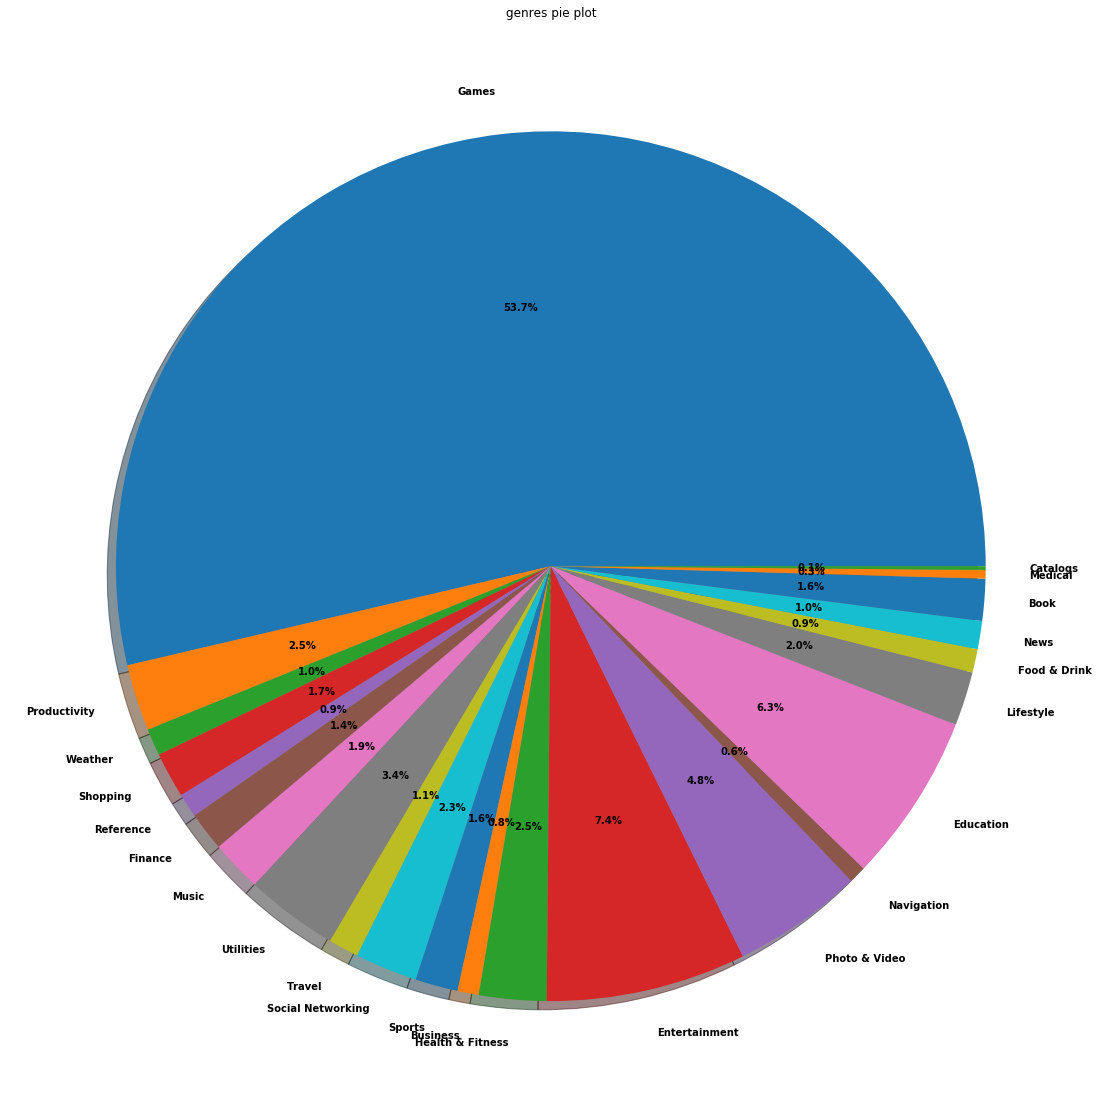

In [23]:
plt.style.use('fast')
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.weight': 'bold'})

lables = df.prime_genre.unique()
sizes = np.zeros(len(lables))
temp = df.groupby(['prime_genre']).count().copy()


for i in range(len(lables)):
    sizes[i] = temp.at[lables[i], 'track_name']

plt.pie(sizes, labels=lables, autopct='%1.1f%%', shadow='True')
plt.title('genres pie plot')

plt.savefig('piePlot.png')
plt.show()

In [24]:
plt.rcParams['figure.figsize'] = [10, 10]

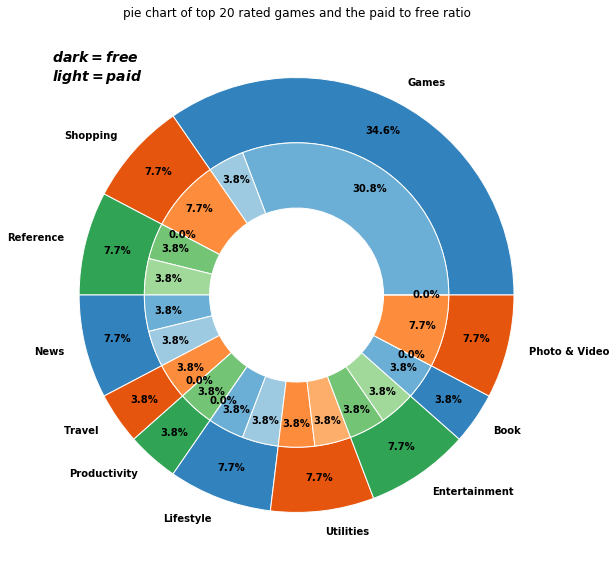

In [25]:
isPrice = np.zeros(len(dfTop20['price']))
dfTop20 = dfTop20.reset_index(drop=True)
for i in range(len(dfTop20['price'])):
    if dfTop20.at[i, 'price'] != 0:
        isPrice[i] = 1

dfTop20['isPrice'] = isPrice

fig, ax = plt.subplots()

size = 0.3
lables = dfTop20.prime_genre.unique()
val = np.zeros((len(lables), 2))
temp = dfTop20.groupby(['prime_genre']).count().copy()


for i in range(len(lables)):
    val[i, 0] = temp.at[lables[i], 'track_name']
    for j in range(len(dfTop20['prime_genre'])):
        if dfTop20.at[j, 'prime_genre'] == lables[i]:
            if dfTop20.at[j, 'isPrice'] == 1:
                val[i, 1] = val[i, 1]+1

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))


ax.pie(val.sum(axis=1),  labels=lables, autopct='%1.1f%%', radius=1, colors=outer_colors, pctdistance=0.85,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(val.flatten(), radius=1-size, colors=inner_colors, autopct='%1.1f%%', pctdistance=0.85,
       wedgeprops=dict(width=size, edgecolor='w'))

textstr = '\n'.join((
    r'$dark = free$',
    r'$light = paid$'))

ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.savefig('piePlot2.png')
ax.set(title='pie chart of top 20 rated games and the paid to free ratio')
plt.show()

## scatter plot

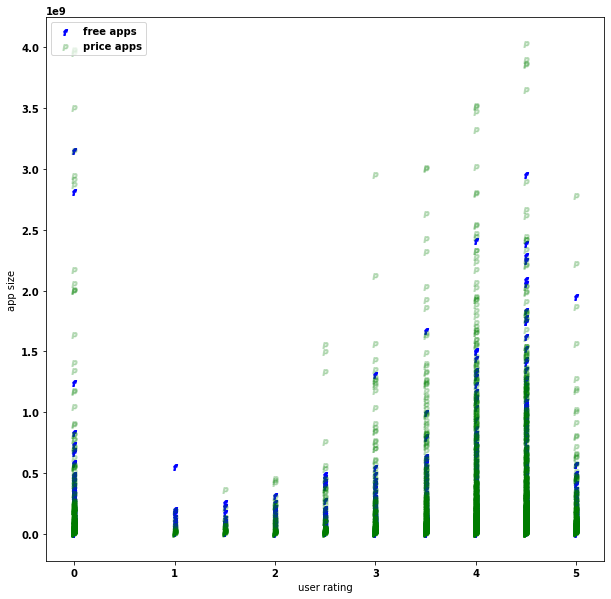

In [26]:
plt.rcParams['figure.figsize'] = [10, 10]
app_size_free = []
usr_rtng_free = []
app_size_price = []
usr_rtng_price = []

for i in range(len(df['price'])):
    if df.at[i, 'price'] == 0:
        app_size_free.append(df.at[i, 'size_bytes'])
        usr_rtng_free.append(df.at[i, 'user_rating'])
    else:
        app_size_price.append(df.at[i, 'size_bytes'])
        usr_rtng_price.append(df.at[i, 'user_rating'])

plt.scatter(usr_rtng_free, app_size_free, c = "b", marker = '$f$', label = "free apps")
plt.scatter(usr_rtng_price, app_size_price, c = "g", marker=r'$p$', label = "price apps", alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel("user rating")
plt.ylabel("app size")
plt.savefig('scatterPlot.png')
plt.show()

## bar plot

In [27]:
dfGenreFree = df[df['price'] == 0]
dfGenreFree = dfGenreFree.groupby(['prime_genre']).mean()
dfGenreFree

,Unnamed: 0,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,lang.num
prime_genre,,,,,,,,,
Book,6219.348485,5.945220e+07,0.0,8498.333333,106.681818,1.598485,1.378788,37.651515,1.924242
Business,3875.600000,7.409505e+07,0.0,6367.800000,183.600000,3.500000,2.600000,36.300000,11.950000
Catalogs,5323.555556,4.517410e+07,0.0,1779.555556,364.777778,1.833333,1.777778,37.222222,1.222222
Education,4044.128788,1.473495e+08,0.0,6266.333333,683.371212,3.484848,2.856061,36.151515,7.560606
Entertainment,4483.500000,9.969423e+07,0.0,10822.961078,179.317365,3.148204,2.761976,36.368263,4.173653
Finance,3568.130952,8.198568e+07,0.0,13522.261905,298.988095,2.220238,1.547619,36.738095,1.607143
Food & Drink,3410.441860,6.742271e+07,0.0,20179.093023,457.465116,3.034884,2.337209,36.883721,3.255814
Games,6247.233939,1.922421e+08,0.0,18924.688968,609.471422,3.528578,3.379708,38.118742,5.070447
Health & Fitness,3459.894737,9.628575e+07,0.0,19952.315789,234.026316,3.578947,3.210526,35.934211,6.736842


In [28]:
dfGenrePaid = df[df['price']!=0]
dfGenrePaid = dfGenrePaid.groupby(['prime_genre']).mean()
dfGenrePaid

,Unnamed: 0,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,lang.num
prime_genre,,,,,,,,,
Book,4853.260870,3.500884e+08,4.359565,286.065217,19.108696,3.739130,3.163043,37.391304,3.021739
Business,2749.513514,5.880278e+07,7.881892,3934.189189,325.108108,3.878378,3.729730,36.027027,10.000000
Catalogs,3563.000000,9.524941e+07,7.990000,1309.000000,163.000000,4.500000,5.000000,38.000000,13.000000
Education,4116.367601,1.940251e+08,5.684704,583.224299,56.267913,3.331776,2.992212,36.890966,7.059190
Entertainment,5479.611940,1.044440e+08,2.368109,2067.905473,77.044776,3.410448,3.129353,37.174129,5.119403
Finance,2075.550000,6.248660e+07,2.190000,654.300000,47.250000,3.325000,2.000000,37.250000,4.950000
Food & Drink,3458.350000,9.946542e+07,4.890000,521.600000,26.350000,3.500000,2.575000,37.000000,4.250000
Games,4426.880374,4.122105e+08,3.447944,6333.624922,527.199377,3.904984,3.777882,37.877259,3.909034
Health & Fitness,3199.500000,8.559114e+07,3.316923,2576.875000,194.528846,3.788462,3.485577,35.855769,6.605769


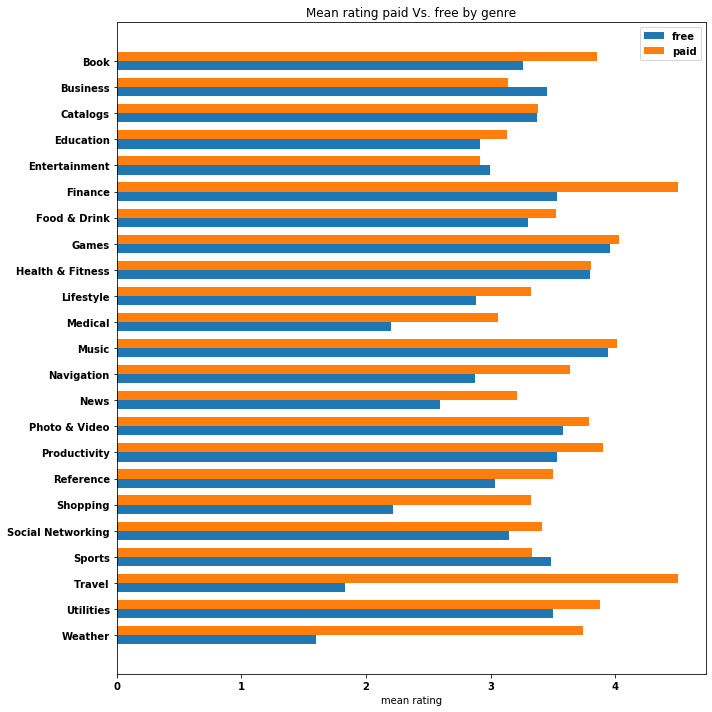

In [29]:
lables = df['prime_genre'].unique()
lables.sort()
lables = lables[-1::-1]

y = np.arange(len(lables))
width = 0.35

rtng_free = dfGenreFree['user_rating'].to_numpy()
rtng_paid = dfGenrePaid['user_rating'].to_numpy()

fig, ax = plt.subplots()
rects1 = ax.barh(y - width/2, rtng_free, width, label='free')
rects2 = ax.barh(y + width/2, rtng_paid, width, label='paid')

ax.set_xlabel('mean rating')
ax.set_title('Mean rating paid Vs. free by genre')
ax.set_yticks(y)
ax.set_yticklabels(lables)
ax.legend()

fig.tight_layout()
plt.savefig('meanPlot.png')
plt.show()

## 3d bar chart

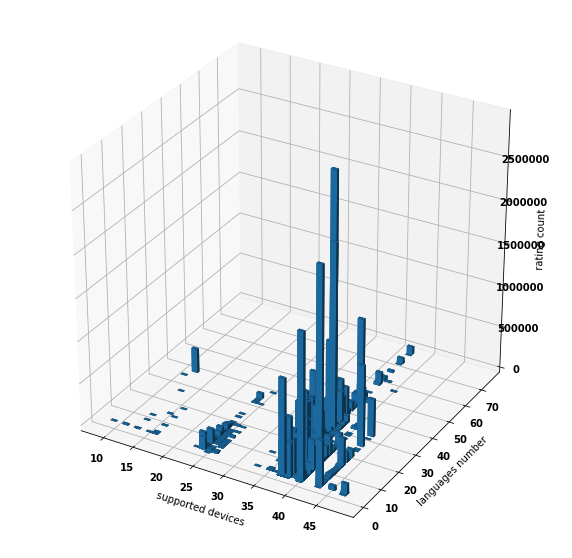

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = df['sup_devices.num'].to_numpy()
y = df['lang.num'].to_numpy()
z = df['rating_count_tot'].to_numpy()


top = z
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, top, shade=True)
ax.set_xlabel('supported devices')
ax.set_ylabel('languages number')
ax.set_zlabel('rating count')

plt.savefig('3dplot.png')
plt.show()

## line plot

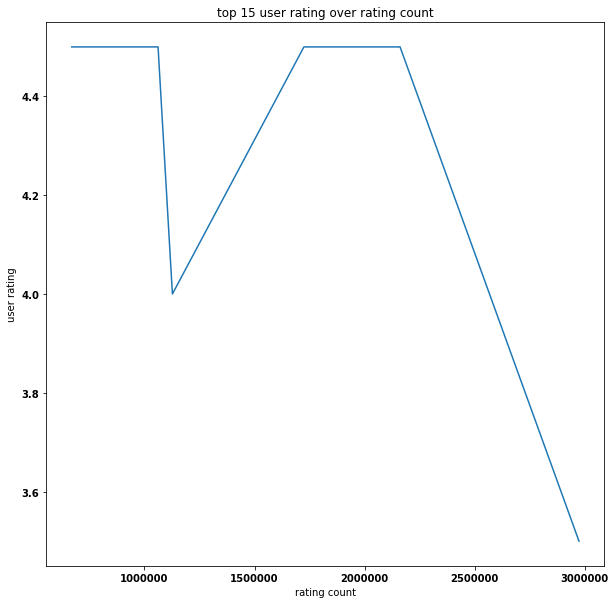

In [31]:
plt.plot(dfTop15['rating_count_tot'], dfTop15['user_rating'])
plt.title('top 15 user rating over rating count')
plt.xlabel('rating count')
plt.ylabel('user rating')
plt.savefig('linePlot.png')
plt.show()

# seaborn graphs

## pair plot

In [32]:
dfGames = df.copy()
dfGames = dfGames[dfGames.prime_genre == 'Games']
dfGames = dfGames.reset_index(drop=True)

In [33]:
dfGamesFree = dfGames[dfGames['price'] == 0]
dfGamesFree

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
8,29,Hangman.,4765696,USD,0.0,42316,248,3.0,3.5,2.0.6,Games,38,1
9,37,Blackjack by MobilityWare,105431040,USD,0.0,180087,1101,3.5,4.5,5.5.3,Games,37,5
11,55,PAC-MAN,100849664,USD,0.0,508808,99,3.0,4.5,6.3.5,Games,38,10
18,99,Beer Pong Game,188956672,USD,0.0,187315,9,2.0,4.0,17.05.15,Games,37,9
25,121,NYTimes Crossword - Daily Word Puzzle Game,46880768,USD,0.0,53465,204,3.5,4.0,2.8.1,Games,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,11060,Demolition Derby Virtual Reality (VR) Racing,168774656,USD,0.0,18,18,4.0,4.0,1.0.0,Games,38,1
3858,11081,Kubik,126644224,USD,0.0,142,75,4.5,4.5,1.3,Games,38,1
3859,11082,VR Roller-Coaster,120760320,USD,0.0,30,30,4.5,4.5,0.9,Games,38,1
3860,11089,VR Roller Coaster World - Virtual Reality,97235968,USD,0.0,85,32,4.5,4.5,1.0.15,Games,38,2


In [34]:
dfGamesPaid = dfGames[dfGames['price'] != 0]
dfGamesPaid

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,6,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,Games,47,1
2,10,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,Games,38,10
3,11,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,Games,38,11
4,12,SCRABBLE Premium,227547136,USD,7.99,105776,166,3.5,2.5,5.19.0,Games,37,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,11041,Survivalcraft 2,57349120,USD,3.99,292,292,4.0,4.0,2.0.20.1,Games,40,1
3851,11043,问仙奇遇-新玩法新套装嗨到爆,208026624,USD,0.99,0,0,0.0,0.0,1,Games,38,1
3855,11074,飞刀传奇-动作武侠热血江湖即时PK传奇（登录爆金装）,537462784,USD,0.99,0,0,0.0,0.0,2.1.0,Games,38,1
3856,11077,Add-Ons Studio for Minecraft,22999040,USD,2.99,97,97,3.0,3.0,1,Games,37,3


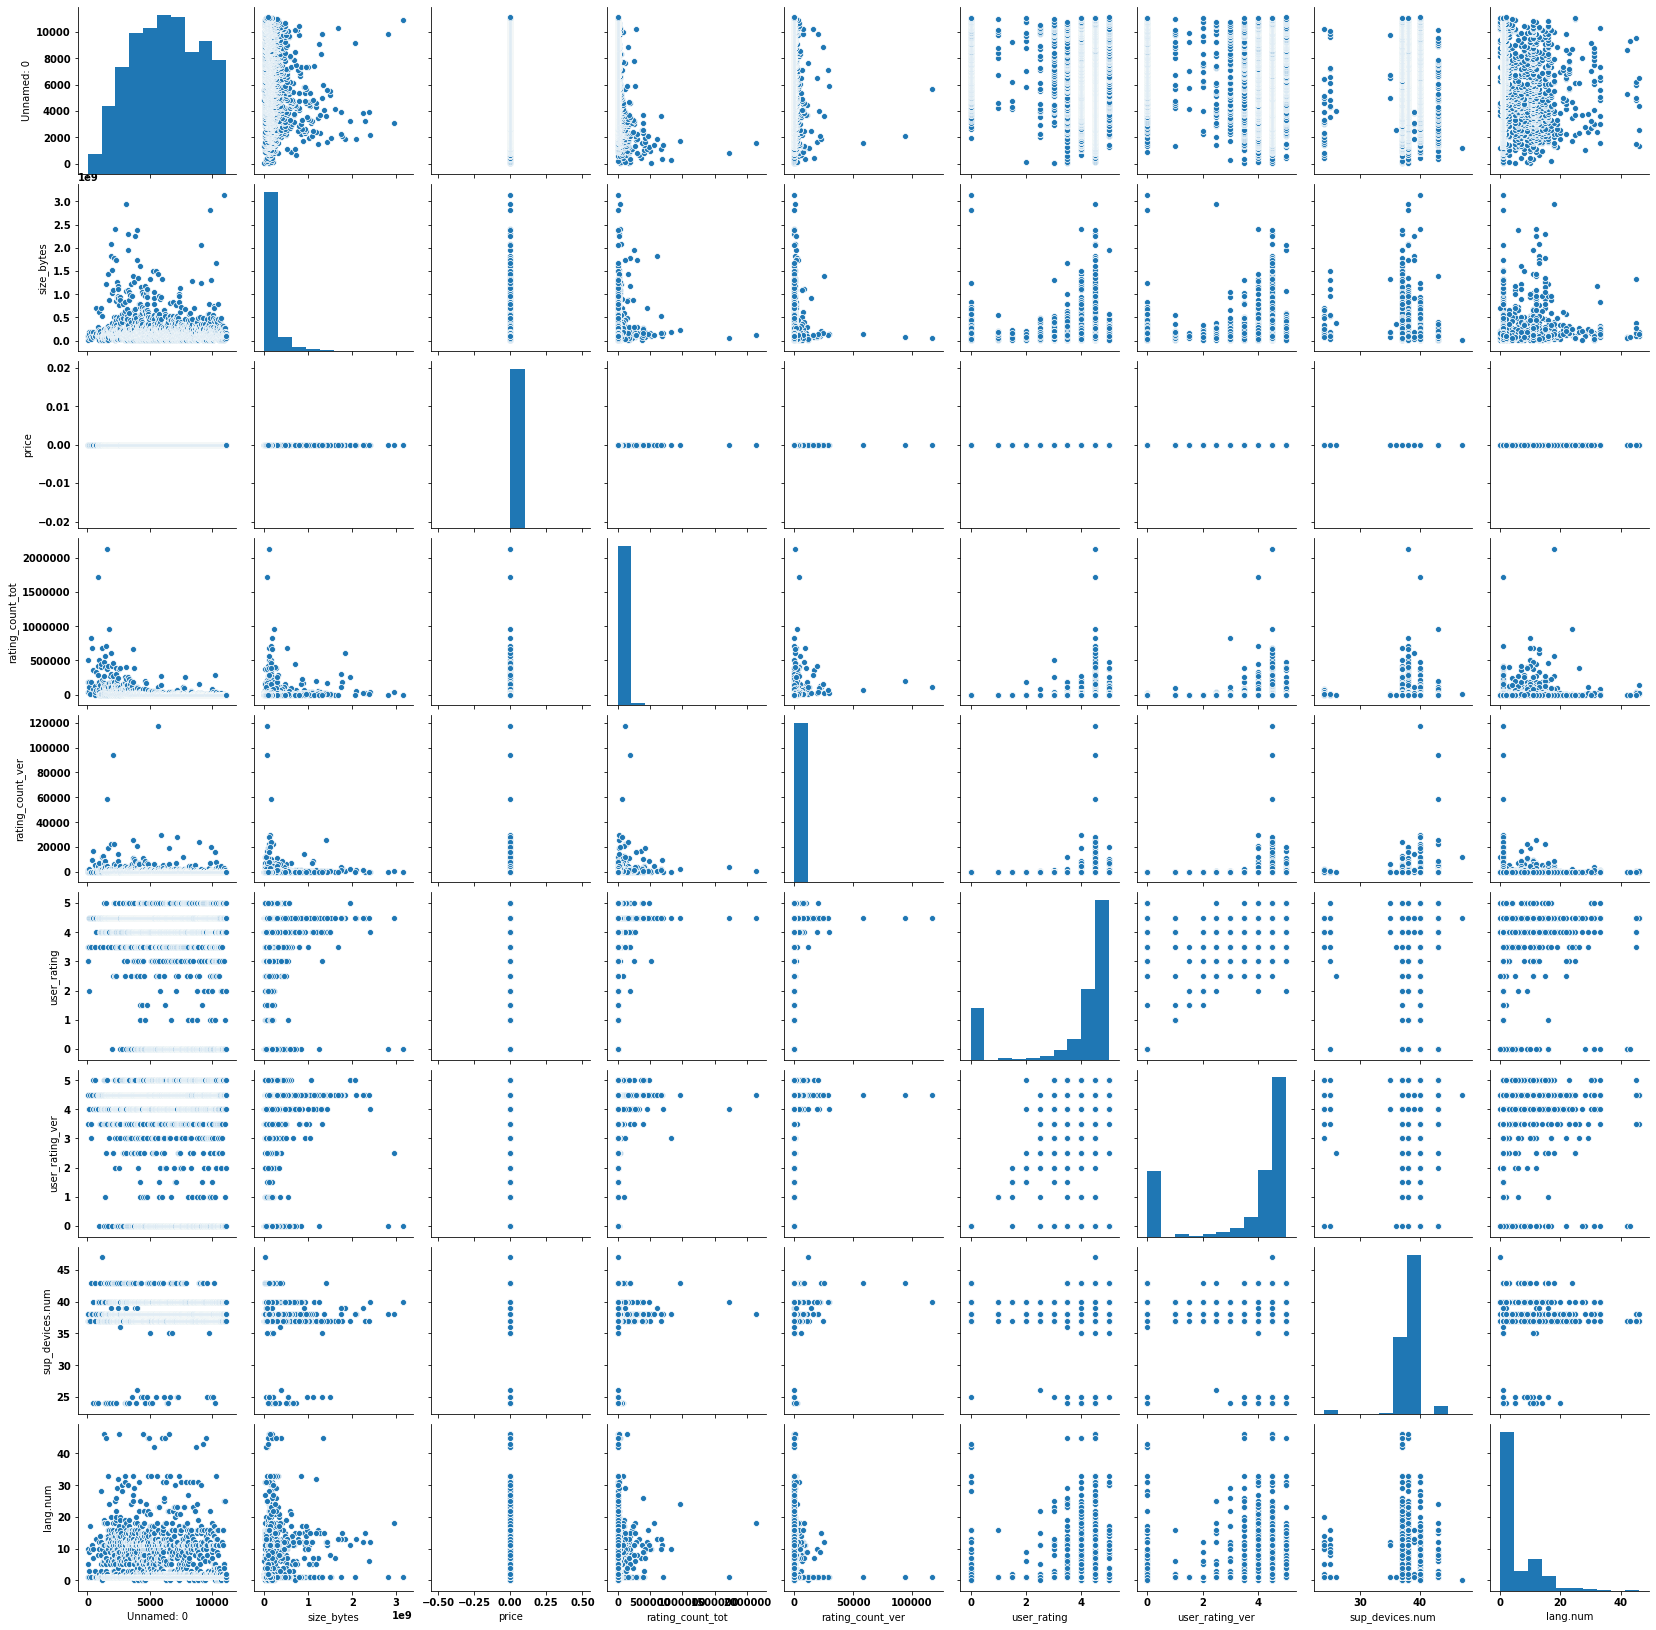

In [38]:
sns.pairplot(dfGamesFree)
plt.savefig('pairplotfree.png')

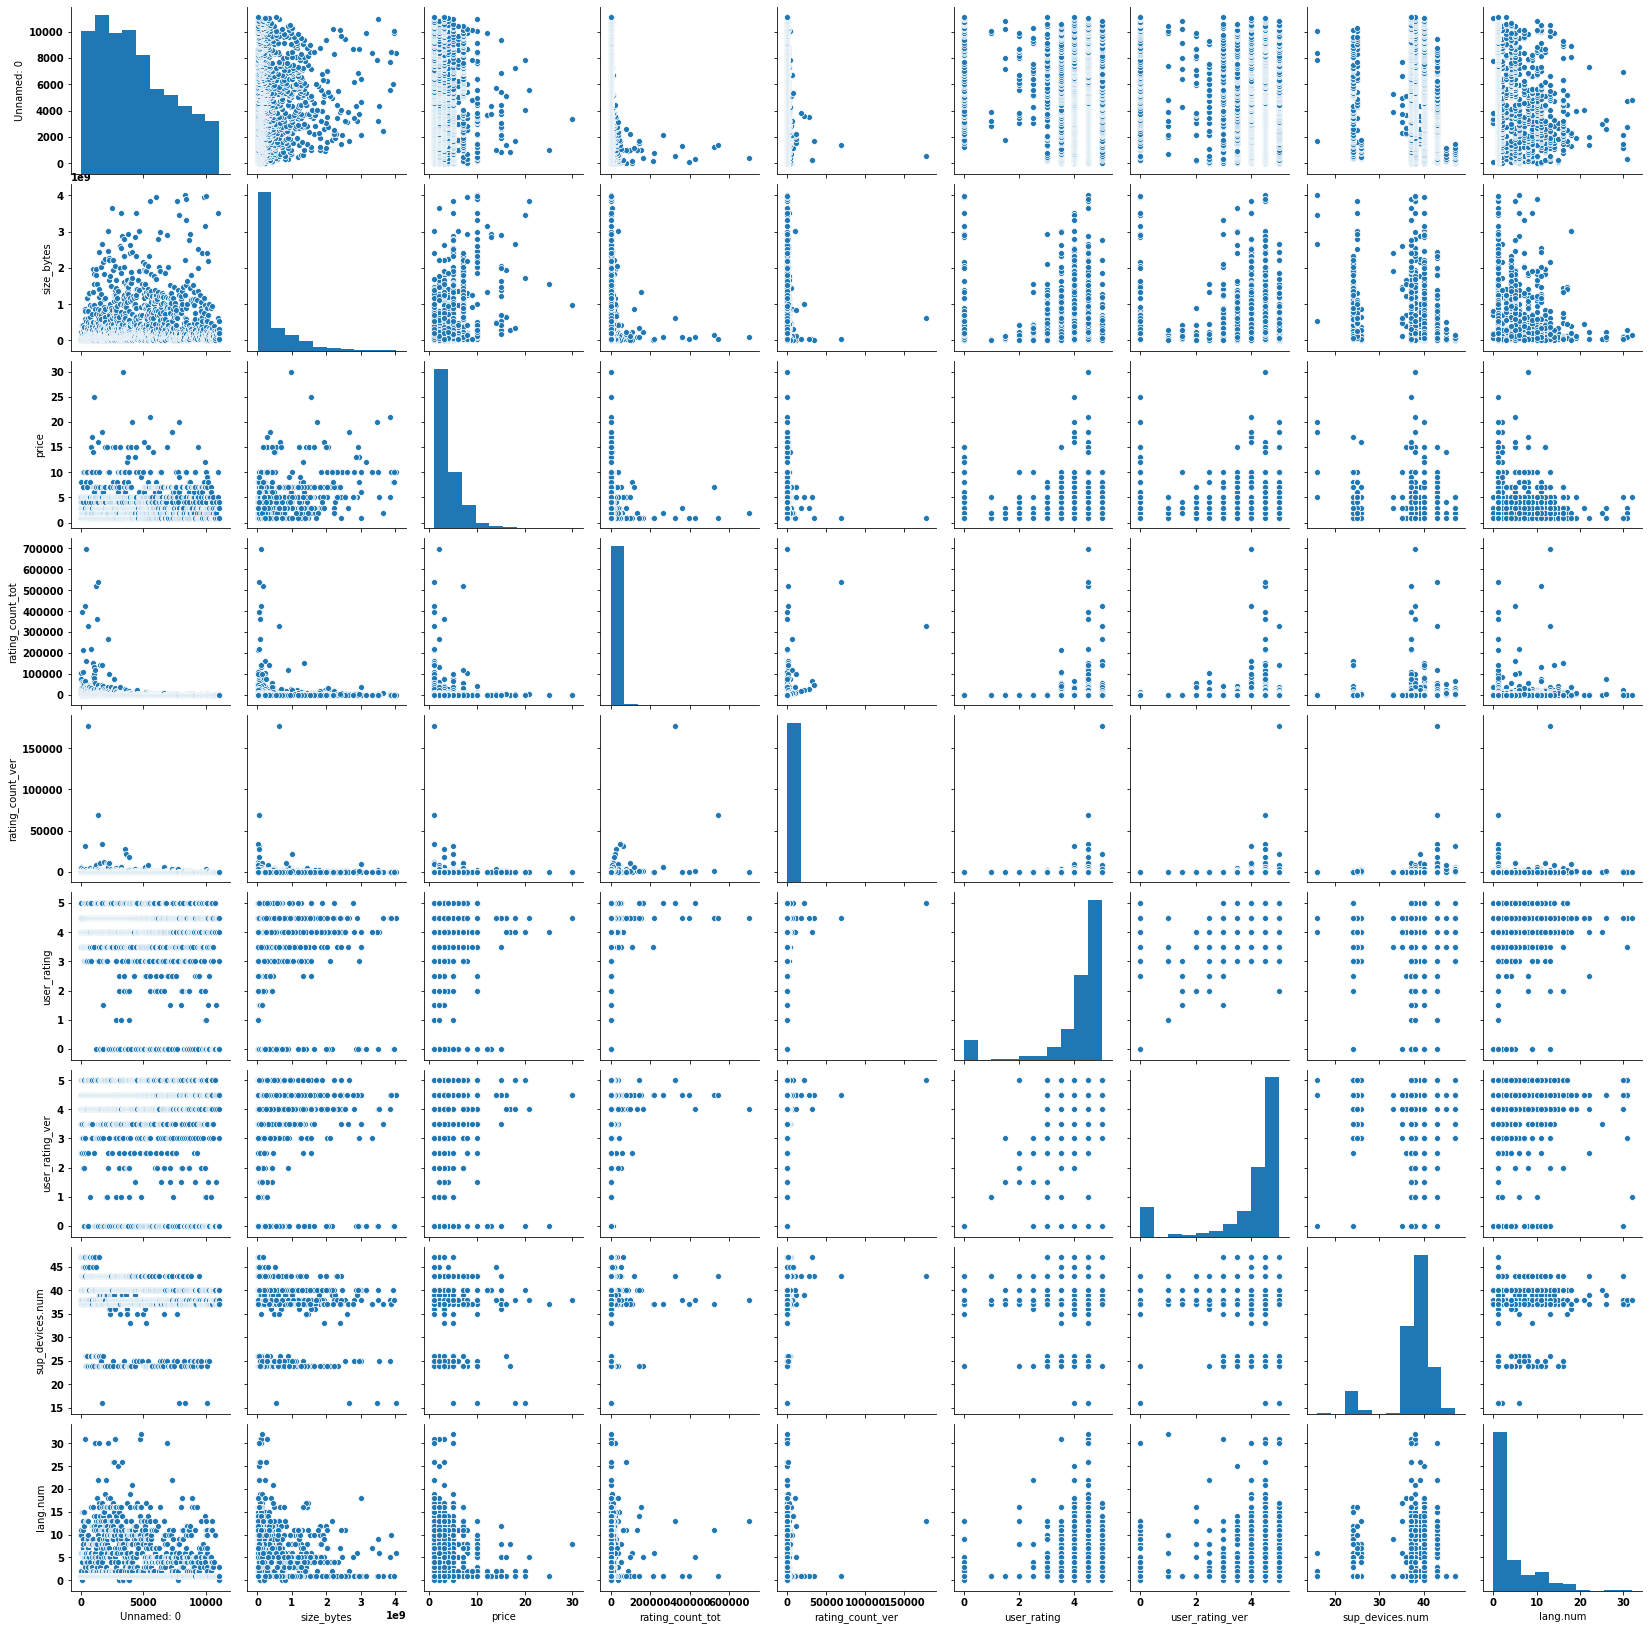

In [39]:
sns.pairplot(dfGamesPaid)
plt.savefig('pairplotpaid.png')

## heat map

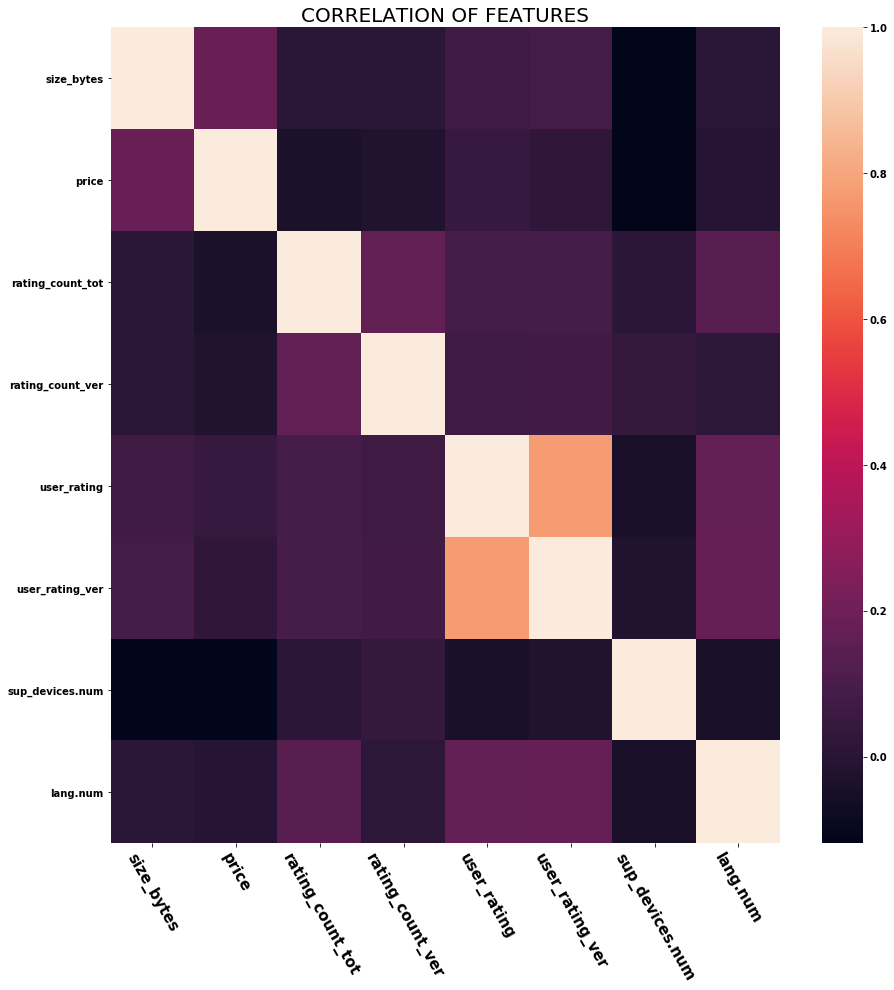

In [40]:
df1 = df.copy()
df1 = df1.drop(columns=['Unnamed: 0', 'track_name', 'currency'])
dfCorr = df1.corr()
plt.figure(figsize=(15,15))
plt.title("CORRELATION OF FEATURES", fontsize=20)
sns.heatmap(dfCorr)
plt.xticks(rotation=(-60), fontsize=15)
plt.yticks(rotation = 360, fontsize=10)
plt.savefig('heatmap.png')
plt.show()

## line plot

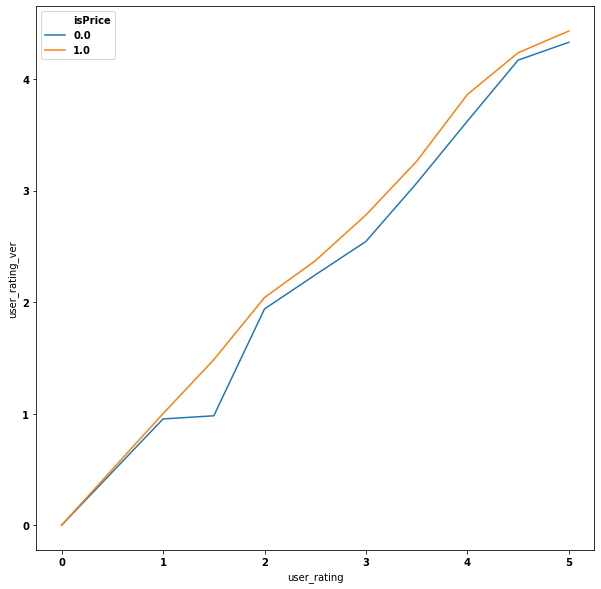

In [41]:
x = df['user_rating']
y = df['user_rating_ver']

isPrice = np.zeros(len(df['price']))
for i in range(len(df['price'])):
    if df.at[i, 'price'] != 0:
        isPrice[i] = 1

df['isPrice'] = isPrice


sns.lineplot(x = x, y = y, color="#4CB391", data = df, hue = 'isPrice', ci = None)
plt.savefig('snsLinePlot.png')

## violin plot

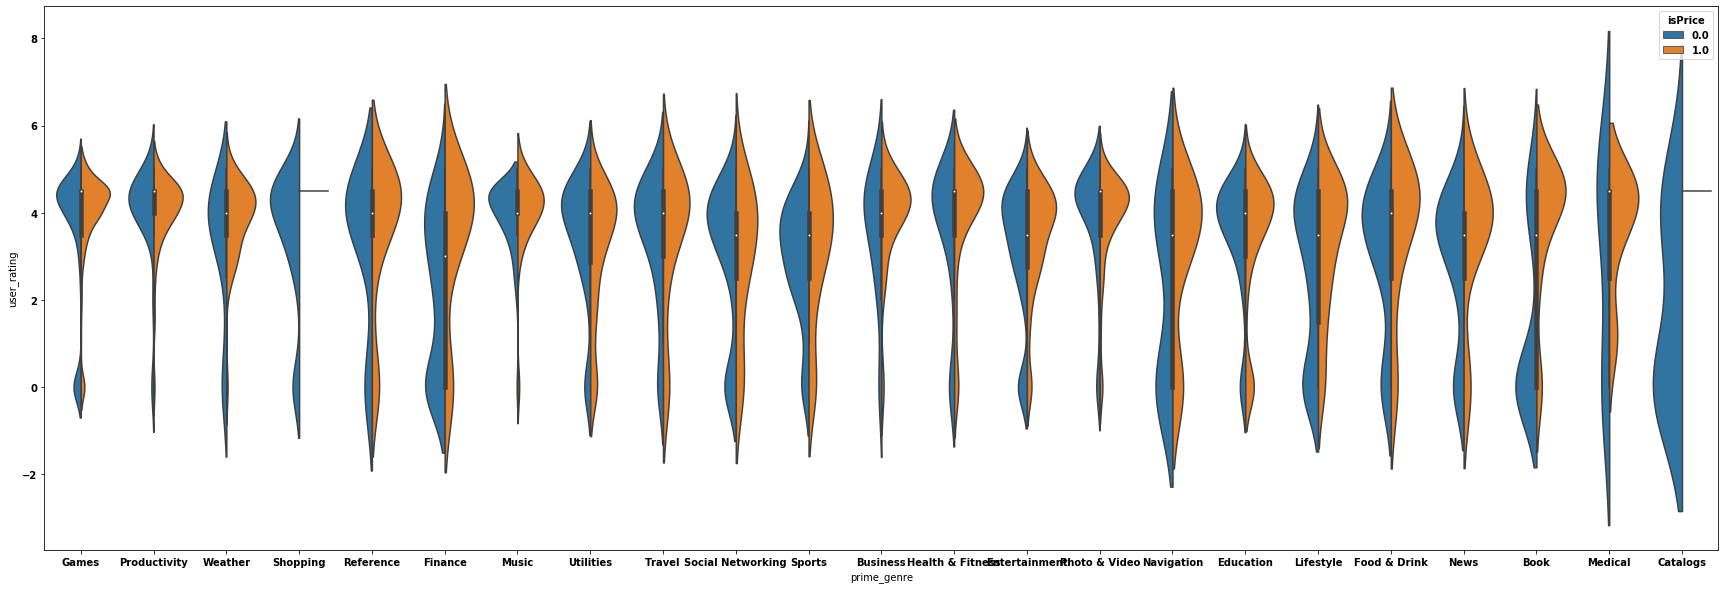

In [42]:
plt.figure(figsize=(30,10))
y = df['user_rating']
x = df['prime_genre']
ax = sns.violinplot(x=x, y=y, data=df, hue = 'isPrice', split = True)
plt.savefig('violinPlot.png')

## hexbin plot

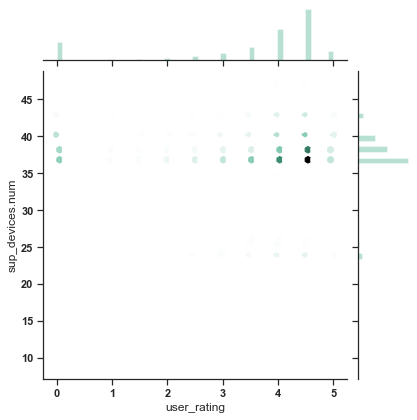

In [43]:
sns.set(style="ticks")

x = df['user_rating']
y = df['sup_devices.num']

sns.jointplot(x, y, kind="hex", color="#4CB391")
plt.savefig('hexbinPlot.png')